## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
from datetime import timedelta, date, datetime
import time
from tqdm import tqdm

## Extract datas from xml files

In [9]:
df = pd.DataFrame(columns=['timestamp', 'source', 'destination', 'bandwidth'])
ini = False
progress = 0
start = 10000
endFile = 10772
numberOfFiles = 10772
numberOfParsedFiles = 0
dataframes = []
for root, dirs, files in os.walk(r'dataset\traffic-matrices'):
    for file in sorted(files):
        path = root + '\\' + file
        if str(path).endswith('.xml'):
            if progress >= start and progress < endFile:
                dataframes.append(pd.DataFrame(columns=['timestamp', 'source', 'destination', 'bandwidth']))
                #Parse xml file
                tree = ET.parse(path)
                treeRoot = tree.getroot()
                #parse date
                info = treeRoot.find("info")
                date = info.find("date")
                dateObject = pd.to_datetime(date.text, format='%Y-%m-%dT%H:%M:%S')
                #parse records
                intraTm = treeRoot.find("IntraTM")
                srcList = intraTm.findall("src")
                for src in srcList:
                    dstList = src.findall("dst")
                    for dst in dstList:
                        new_row = pd.DataFrame({'timestamp':[dateObject], 'source':[src.get('id')], 'destination':[dst.get('id')], 'bandwidth':[dst.text]})
                        df = pd.concat([df, new_row], ignore_index=True)                        
                numberOfParsedFiles += 1
                
            progress += 1
            x = (100/endFile) * progress
            print('\r{0}%'.format(x), end='\r')
        if numberOfParsedFiles == endFile:
            break
    if numberOfParsedFiles == endFile:
        break
df

,timestamp,source,destination,bandwidth
0,2005-04-21 16:00:00,12,12,346594.9689
1,2005-04-21 16:00:00,12,13,19286.0089
2,2005-04-21 16:00:00,12,19,6065.8222
3,2005-04-21 16:00:00,12,23,2235.7867
4,2005-04-21 16:00:00,12,8,237.6622
...,...,...,...,...
343542,2005-04-29 16:45:00,15,14,13.3333
343543,2005-04-29 16:45:00,15,11,87.6444
343544,2005-04-29 16:45:00,15,9,4293.6444
343545,2005-04-29 16:45:00,15,17,2277.6533


[Text(0.5, 0, 'Timestamp'), Text(0, 0.5, 'Bandwidth')]

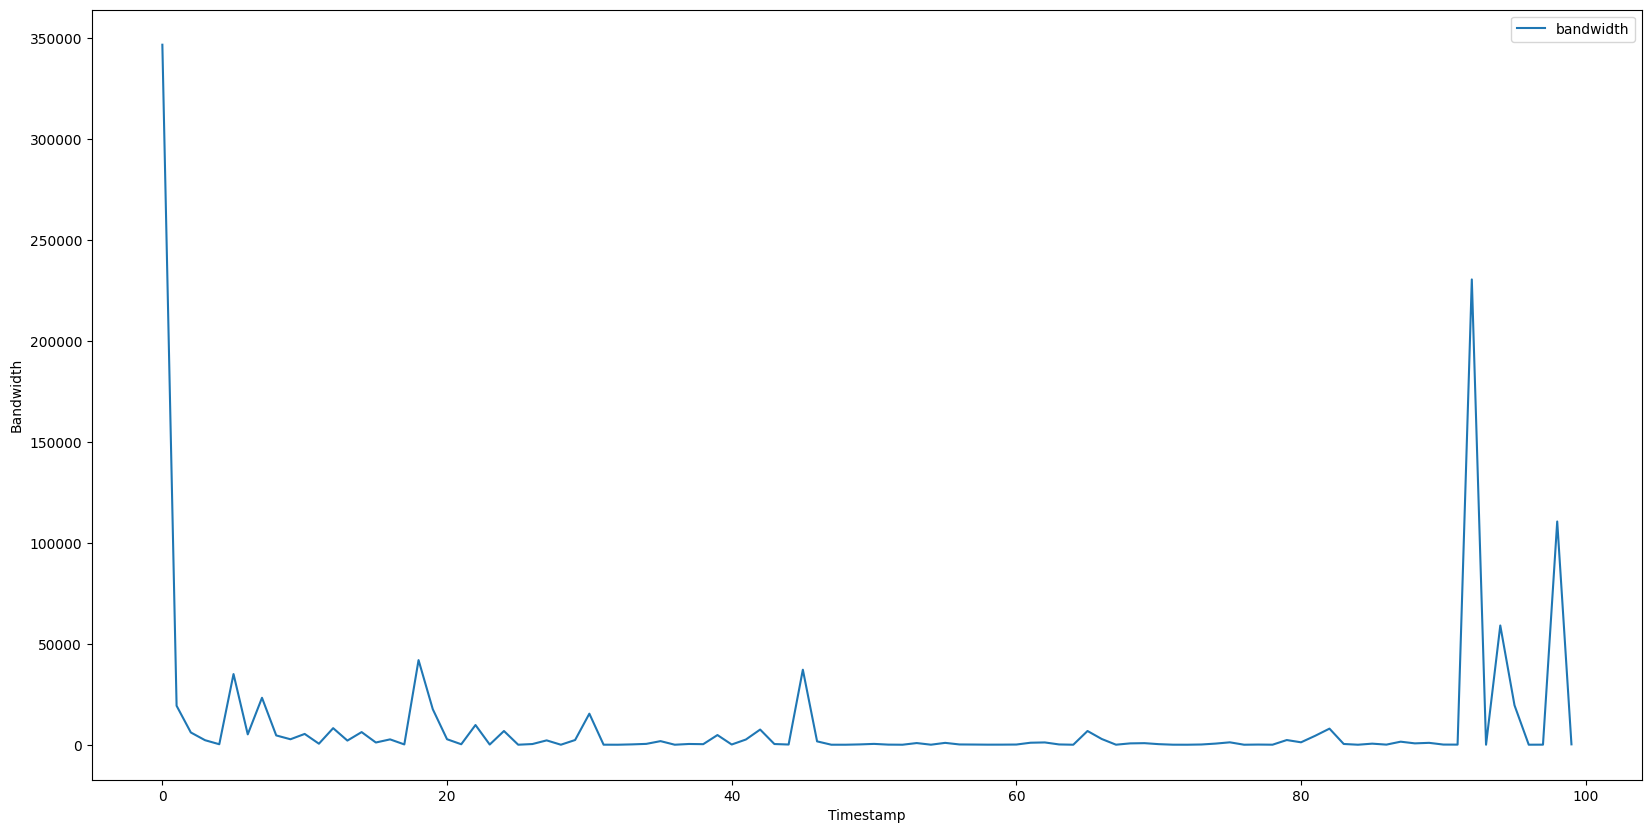

In [3]:
df[:100].plot(y = ["bandwidth"], figsize=(20,10)).set(xlabel="Timestamp", ylabel="Bandwidth")

In [4]:
df_Grouped = df.groupby(['timestamp','source' ,'destination']).sum() #Goup the data by timestep and country

df_bandwidthPerDestination = df_Grouped['bandwidth'].unstack().fillna(0) #count all traces per country per timestep

print(df_bandwidthPerDestination)

destination                         1           2          3           4    
timestamp           source                                                  
2005-04-21 16:00:00 1       26041.3600  32088.9867    21.4133    327.2000  \
                    2       41294.2044   6158.2400   145.2889  11058.1689   
                    3        5712.3911   3608.3556   616.1156    948.1689   
                    4       39462.4889  34018.5333    42.6667    976.0711   
                    5       36520.0622    212.9778   342.7289    321.9822   
...                                ...         ...        ...         ...   
2005-04-29 16:45:00 19      17214.8711   1233.7511    84.5600   1044.7022   
                    20        797.8933   2319.1200   107.5111    301.8311   
                    21      15901.9467   9678.2756  1546.9067   1162.3378   
                    22        587.8133    750.6311    10.3111   2096.2133   
                    23        110.4356    150.1867     0.0000    176.8000   

### Replacing Unix timestamp with real date

In [5]:
df_bandwidthPerDestination.xs(11, level='source', drop_level=False)

,destination,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
timestamp,source,,,,,,,,,,,,,,,,,,,,,
2005-04-21 16:00:00,11,37294.4444,4808.0889,1240.8800,1712.2756,971.3867,0.0,0.0,123.1911,50604.3022,319.9644,...,51.1111,34.7644,8366.2400,486884.9956,13.7511,137.1467,147.5733,473.8933,0.0,3.5733
2005-04-21 16:15:00,11,35387.4667,4531.6444,1218.7733,2358.3200,1219.2444,0.0,0.0,265.7956,48883.2000,498.0800,...,87.2444,33.7422,9822.4622,484957.9911,46.0800,114.1867,66.8000,234.6756,0.0,4.5244
2005-04-21 16:30:00,11,35246.9333,5174.7111,1302.7822,1794.7022,1200.4711,0.0,0.0,313.6178,48647.5200,646.1333,...,79.4933,978.5422,9599.0044,510055.3333,70.4978,302.1067,341.2356,254.2578,0.0,11.8578
2005-04-21 16:45:00,11,36709.8222,4611.9644,1162.3378,1374.8889,1161.4044,0.0,0.0,753.2089,51015.3778,676.8889,...,38.4089,386.1867,10858.8800,532863.3422,102.4622,41.7511,612.1778,282.8889,0.0,5.3778
2005-04-21 17:00:00,11,41236.8800,5234.2222,1487.2444,1837.1911,1160.5778,0.0,0.0,953.0933,52598.6933,374.3200,...,60.6844,734.2044,10242.7733,540209.6800,514.4978,76.3556,1571.7511,611.8756,0.0,54.2489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-29 15:45:00,11,3565.4489,1480.5600,1101.3067,915.3511,775.9022,0.0,0.0,402.4356,56621.6089,1316.2400,...,5.3511,118.0711,28971.1733,603514.4444,307.3244,169.0489,818.9422,737.6800,0.0,16.9244
2005-04-29 16:00:00,11,5643.9733,1416.0356,1255.9289,737.2000,614.6133,0.0,0.0,235.4844,60120.2489,2352.8178,...,57.8578,16.1956,27329.4756,604966.3200,270.3111,157.4578,972.9600,850.8622,0.0,6.0178
2005-04-29 16:15:00,11,6606.2044,1338.7022,885.2978,650.5067,641.3600,0.0,0.0,1217.7778,59091.6178,2539.1911,...,57.4667,7.2622,27750.0089,587671.8133,161.3689,39.5911,907.5644,582.0978,0.0,9.8222


### Example plot with source = 1 and destination = 1,2,3

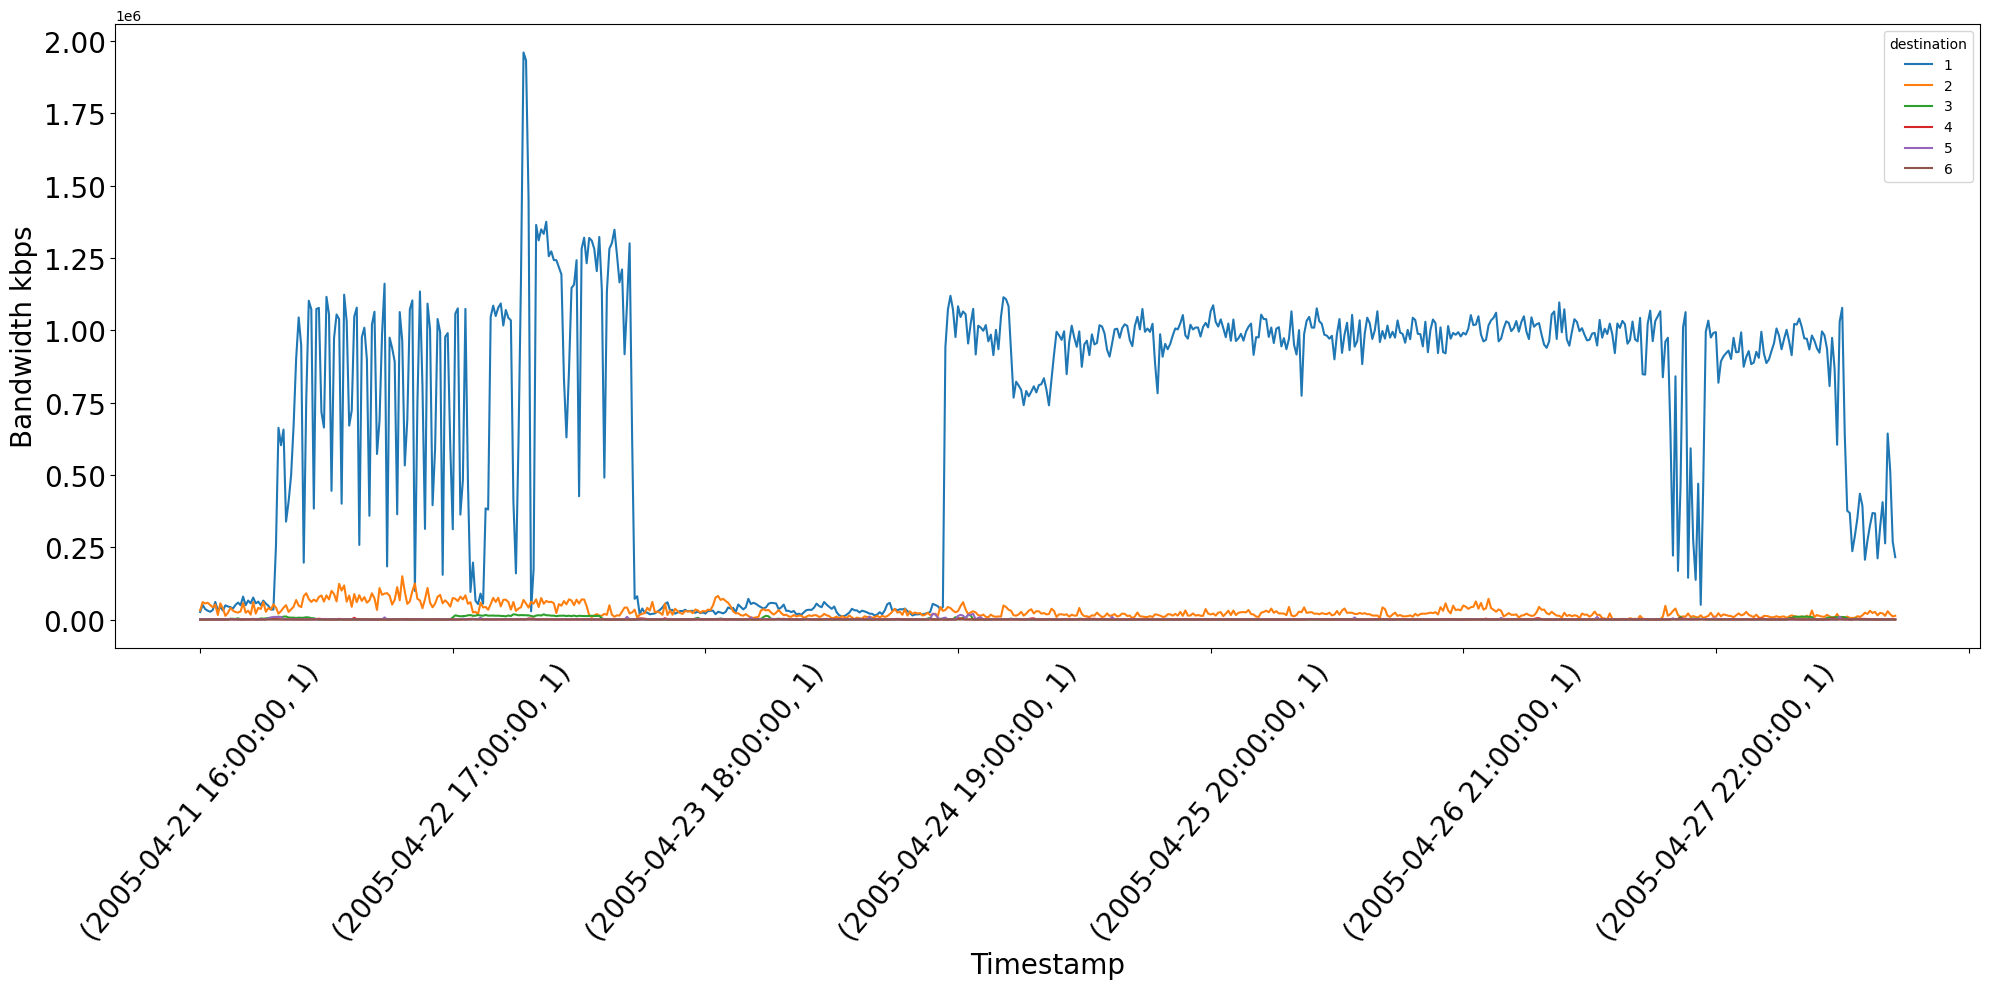

In [17]:
ax = df_bandwidthPerDestination.xs(1, level='source', drop_level=False)[0:672].plot(y = [1,2,3,4,5,6], figsize=(20,10), fontsize=20, rot=50)
ax.set_xlabel("Timestamp", fontsize=20)
ax.set_ylabel("Bandwidth kbps", fontsize=20)
fig = ax.get_figure()
fig.tight_layout()
# fig.savefig('../../Documents/Thesis/Pictures/Dataset/TOTEMPlotFirstWeek6DestinationsFrom1.pdf')

In [ ]:
start_date = datetime(2005, 1, 1, 0, 30, 0)
current_date = datetime(2005, 1, 1, 0, 30, 0)
end_date = datetime(2005, 4, 29, 16, 45, 0)

dataframes = pd.DataFrame(columns=['timestamp', 'source', 'destination', 'bandwidth'])
dataframe = pd.DataFrame(columns=['timestamp', 'source', 'destination', 'bandwidth'])
frame_counter = 0

for source in tqdm(range(1, 24)):
    df_source = df[(df.source == source)]
    for destination in range(1, 24):
        df_destination = df_source[(df_source.destination == destination)]
        while current_date <= end_date:
            single_row = df_destination[(df_destination.timestamp == str(current_date))]
            if single_row.empty:
                d = {'timestamp': [current_date], 'source': [source], 'destination': [destination], 'bandwidth': [0]}
                dataframes = pd.concat([dataframes, pd.DataFrame(d)])
            current_date = current_date + timedelta(seconds=900)
#         df_temp = pd.concat(dataframes)
        dataframe = pd.concat([dataframe, dataframes], ignore_index=True)
        dataframes = pd.DataFrame(columns=['timestamp', 'source', 'destination', 'bandwidth'])
        current_date = datetime(2005, 1, 1, 0, 30, 0)
dataframe.append(df)

In [7]:
dataframe = pd.concat([dataframe, df], ignore_index=True)

In [22]:
dt = dt.sort_values('timestamp')

In [ ]:
dt = dt[['bandwidth']!=0.0]
dt.index = range(len(dt))

In [23]:
path = r'dataset\all_in_one_complete_appended.csv'
dt.to_csv(path, encoding='utf-8', index=False)